In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [ ]:
iris = datasets.load_iris()
X = iris['data'][:, (2, 3)]
y = (iris['target'] == 2).astype(np.float64)

svm_clf = Pipeline([
                    ('scaler', StandardScaler()),
                    ('linear_svc', LinearSVC(C=1, loss='hinge'))
])
svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [ ]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [47]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot as plt

X, y = make_moons(n_samples=100, noise=0.15)
lin_clf = LinearSVC(C=10, loss='hinge')
polynomial_svm_clf = Pipeline([
                               ('poly_features', PolynomialFeatures(degree=3)),
                               ('scaler', StandardScaler()),
                               ('svm_clf', lin_clf)
])

polynomial_svm_clf.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

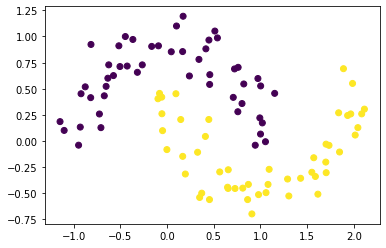

In [ ]:
plt.scatter(x=X[:, 0], y=X[:, 1], c=y)

In [45]:
pol_features = PolynomialFeatures(degree=3)
pol_features.fit_transform(X)

array([[ 1.00000000e+00,  4.57756802e-01,  6.34118886e-01,
         2.09541290e-01,  2.90272233e-01,  4.02106762e-01,
         9.59189505e-02,  1.32874089e-01,  1.84067105e-01,
         2.54983492e-01],
       [ 1.00000000e+00,  8.62596837e-01, -5.60151554e-01,
         7.44073304e-01, -4.83184959e-01,  3.13769764e-01,
         6.41835279e-01, -4.16793818e-01,  2.70656806e-01,
        -1.75758621e-01],
       [ 1.00000000e+00,  2.08442503e+00,  2.59254192e-01,
         4.34482770e+00,  5.40395926e-01,  6.72127359e-02,
         9.05646761e+00,  1.12641479e+00,  1.40099909e-01,
         1.74251835e-02],
       [ 1.00000000e+00, -3.66410348e-01,  9.70534380e-01,
         1.34256543e-01, -3.55613840e-01,  9.41936983e-01,
        -4.91929867e-02,  1.30300591e-01, -3.45135458e-01,
         9.14182225e-01],
       [ 1.00000000e+00,  1.00223314e+00,  5.26245382e-01,
         1.00447127e+00,  5.27420563e-01,  2.76934202e-01,
         1.00671440e+00,  5.28598368e-01,  2.77552636e-01,
         1.

In [53]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
                                ('scaler', StandardScaler()),
                                ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

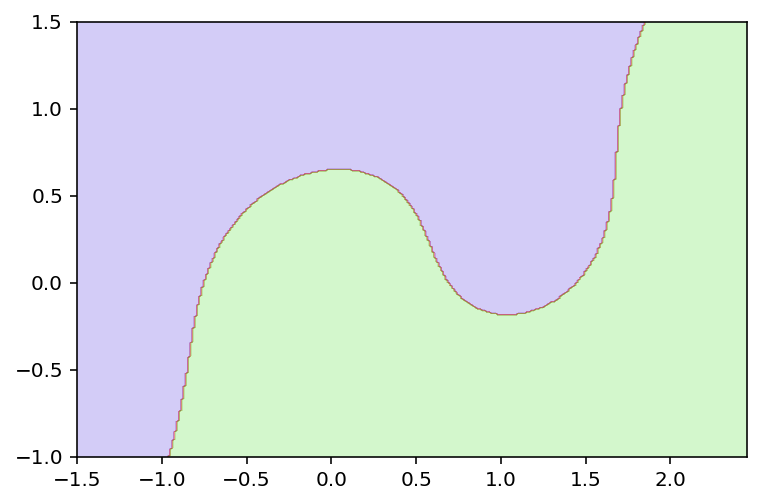

In [71]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 300)
    x1s = np.linspace(axes[2], axes[3], 300)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

%config InlineBackend.figure_format = 'retina'
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])